# Dimension reduction and feature extration

## Principal Component Analysis

### Implement PCA

- Write a function `basic.pca` that estimates the data mean and principal components directions. `transform(X)` that project a new the data into the principal components.

- Check that your `BasicPCA` pfermed simillarly than the one from sklearn:
`from sklearn.decomposition import PCA`

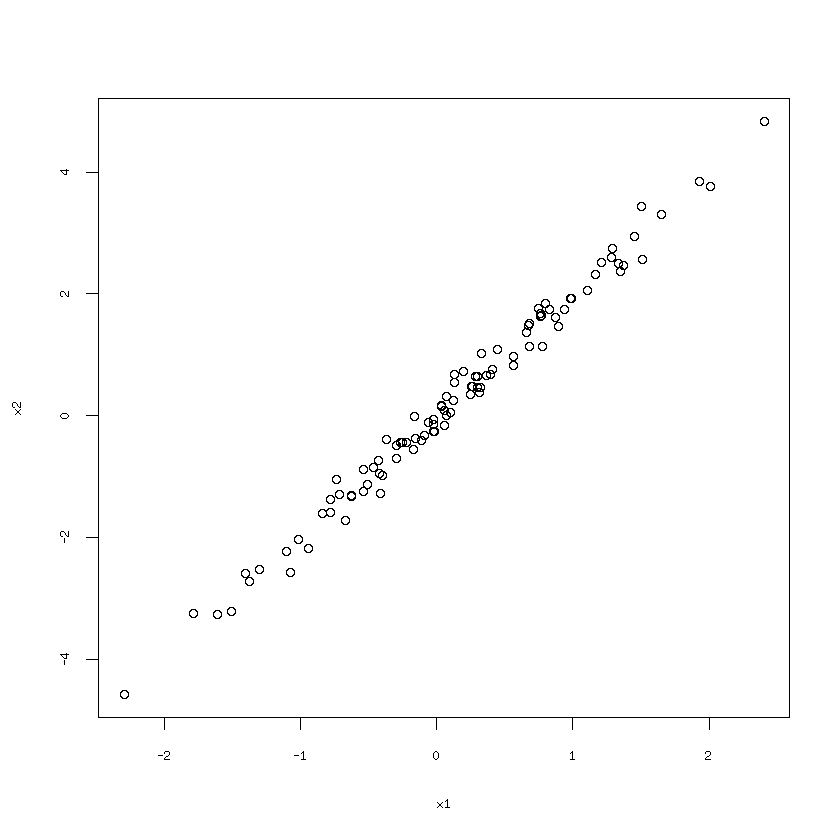

In [2]:
x0=rnorm(100)
x1=x0+rnorm(100,sd=.1)
x2=2*x0+rnorm(100,sd=.1)
plot(x1,x2)
X=as.matrix(data.frame(x1,x2))

In [4]:
o = list()